# Описание проекта

Мы получили датасет от магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
У нас есть данные от 1985 до 2016 года. Магазин планирует рекламную компанию на 2017-й. 

**Задача:**

Нужно опеределить какие платформы будут перспективными в следующем году и сделать ставку на самые привлекательные с учетом объемов продаж.
Необходимо опеределить зависимости продаж от рейтинга, жанра, региона и платформы для игр.

**Описание данных:**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откроем-файл-с-данными-и-изучим-информацию" data-toc-modified-id="Откроем-файл-с-данными-и-изучим-информацию-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Откроем файл с данными и изучим информацию</a></span></li><li><span><a href="#Переработка-данных" data-toc-modified-id="Переработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Переработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Составим-портрет-пользователя-для-каждого-региона" data-toc-modified-id="Составим-портрет-пользователя-для-каждого-региона-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Составим портрет пользователя для каждого региона</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Сборный проект №1

### Откроем файл с данными и изучим информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08  

In [3]:
df.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Некоторые столбцы содержат неверный формат - необходимо будет изменить его. Названия столбцов необходимо привести к нижнему регистру.
Также присутствуют пропуски в значениях - необходимо найти логическую замену этим пропускам или оставить их пустыми, если такой замены найти нвозможно. Также нуобходимо посчитать суммарные продажи во всех регионах и записать их в отдельный столбец

### Переработка данных

Переименуем столбцы и приведем названия к нижнем регистру

In [4]:
df = df.rename(columns={'Name': 'name','Platform':'platform','Year_of_Release':'year_of_release',\
                       'Genre':'genre','NA_sales':'na_sales','EU_sales':'eu_sales','JP_sales':'jp_sales',\
                       'Other_sales':'other_sales','Critic_Score':'critic_score',\
                       'User_Score':'user_score','Rating':'rating'})

#Проверим результат
df.columns.tolist()

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

**Преобразуем данные в нужные типы**

In [5]:
#Проверим уникальные значения столбца Critical Score
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Значения оценок критиков в столбце имеют целые значения, но тип данных неверный. Необходимо заменить тип данных. Так же заменим тип данных у столбца year_of_Release

In [6]:
df['year_of_release']= df['year_of_release'].astype('Int64')
df['critic_score']= df['critic_score'].astype('Int64')
df['critic_score'].unique()

<IntegerArray>
[  76, <NA>,   82,   80,   89,   58,   87,   91,   61,   97,   95,   77,   88,
   83,   94,   93,   85,   86,   98,   96,   90,   84,   73,   74,   78,   92,
   71,   72,   68,   62,   49,   67,   81,   66,   56,   79,   70,   59,   64,
   75,   60,   63,   69,   50,   25,   42,   44,   55,   48,   57,   29,   47,
   65,   54,   20,   53,   37,   38,   33,   52,   30,   32,   43,   45,   51,
   40,   46,   39,   34,   35,   41,   36,   28,   31,   27,   26,   19,   23,
   24,   21,   17,   22,   13]
Length: 83, dtype: Int64

**Опеределим количество пропущеных значений в датасете:**

In [7]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Данные с пропусками в столбцах название и жанр можно просто удалить, их очень малое количество. Пропуски в данных оценок критиков и пользователей придется оставить как есть, т.к просто заменить их по медианным значениям или средней мы не можем, как не можем и заменить их нулями. Пропуски в оценках рейтинга можно заменить обозначением "Рейтинг не определен", т.к рейтинг оценок ESRB используется только для стран США и Канады, поэтому скорее всего это значит что игры были выпущены не только для этих стран. Так же в столбце "year_of_release" имеется 269 пропусков - проверим остальную информацию для этих строк и примем решение.

In [8]:
#Заменим пропуски в толбце rating
df['rating']= df['rating'].fillna('not determined')

In [9]:
#Проверим остальную информацию для строк в которых были допущены пропуски в столбце "year_of_release"
display(df[df['year_of_release'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,<NA>,NaN,not determined
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,<NA>,NaN,not determined
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43,tbd,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,<NA>,NaN,not determined


In [10]:
#Посчитаем процент пропусков по столбцам
df.isnull().sum().sort_values(ascending = False) / df.shape[0] * 100

critic_score       51.319174
user_score         40.089740
year_of_release     1.609333
name                0.011965
genre               0.011965
platform            0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
rating              0.000000
dtype: float64

В этих строках так же встречаются пропуски с оценками критиков и покупателей. Удалим эти строки

In [11]:
#удали строки с пропусками
df= df.dropna(subset=['name', 'year_of_release' ])

In [12]:
#Еще раз проверим количество пропусков в столбцах
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

В столбце с оценкой пользователей присутсвует аббревиатура - 'tbd'. Это означает что оценка требует уточнений. Определим количество таких значений в столбце.

In [13]:
df['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.6       2
1.3       2
1         2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Т.к эти значения нельзя заменить на медианные\средние - мы заменим их пропусками, чтобы была возможность выполнять с ними вычесления.

In [14]:
df['user_score'] = df['user_score'].replace('tbd', 'NaN', regex=True)
df['user_score'] = df['user_score'].astype('float')

In [15]:
df['user_score'].value_counts()

7.8    322
8.0    285
8.2    276
8.3    252
7.5    249
      ... 
2.3      2
0.7      2
1.1      2
9.7      1
0.0      1
Name: user_score, Length: 95, dtype: int64

In [16]:
#Посчитаем продажи во всех регионах и добавим в отдельный столбец
df['all_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,not determined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,not determined,31.38


In [17]:
#Проверим наличие дубликатов
df.duplicated().sum()

0

Отлично. Дубликатов нет.

In [18]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  all_sales        16444 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.7+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

### Исследовательский анализ данных

**Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

In [19]:
#Посмотрим, сколько игр выпускалось в разные годы.
df['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64

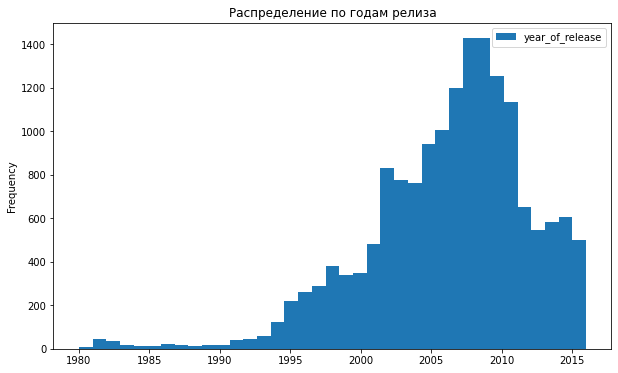

In [20]:
#Построим гистограму для удобной визуализации данных
#df['year_of_release'].hist(bins=37,figsize=(10, 6));
games_hist= df['year_of_release'].plot(kind='hist', bins=37,figsize=(10, 6)).legend()
plt.title('Распределение по годам релиза');

У нас есть данные с 1980 года. До 1995 данные на графике "плато". После 1995 начался рост, скорее всего связанный с быстрым развитие технологий: компьютеры стали мощнее, а игры стали превлекательней. После 2010 года количество выпускаемых игр резко снизилось - это может быть связано с высокой ценой производства игр и развитием мобильных плтаформ.  На графике нет выбросов и слишком длинных хвостов: все данные могут быть использованы для исследования, но нас интересует только плследние 4-5 лет для корректного исследования, да и в целом технологии с 1980 года очень сильно изменились.

**Проверим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

In [21]:
#Посчитаем количество игр для платформ с наибольшими продажами за все время
pivot_sales_platform = df.groupby('platform').agg({'all_sales':'sum'})
pivot_sales_platform.sort_values(by='all_sales', ascending=False)

,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


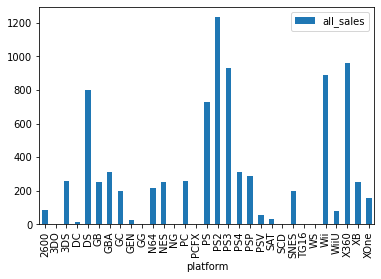

In [22]:
#Также посмотрим на график продаж на всех платформах
pivot_sales_platform.plot.bar();

In [23]:
#Соберем самые успешные платформы по продажам в отдельные списки
ps2 = df[df['platform']=='PS2']
ds = df[df['platform']=='DS']
ps3 = df[df['platform']=='PS3']
wii = df[df['platform']=='Wii']
ps4 = df[df['platform']=='PS4']
psp = df[df['platform']=='PSP']
pc = df[df['platform']=='PC']
x360 = df[df['platform']=='X360']
ps = df[df['platform']=='PS']
x_one = df[df['platform']=='XOne']
psv = df[df['platform']=='PSV']
wiiu = df[df['platform']=='WiiU']
ds3 = df[df['platform']=='3DS']

Построим графики продаж по годам для каждой платформы

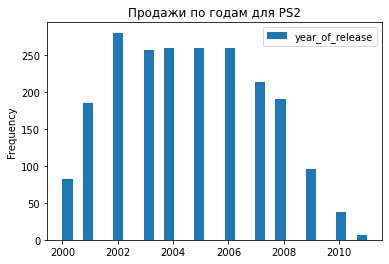

In [24]:
ps2.plot(kind='hist',x='all_sales',y='year_of_release',bins=30);
plt.title('Продажи по годам для PS2');

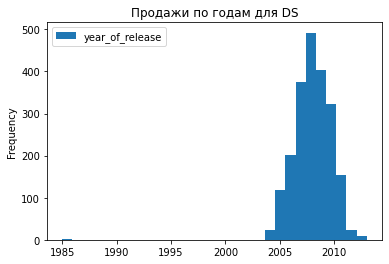

In [25]:
ds.plot(kind='hist',x='all_sales',y='year_of_release',bins=30);
plt.title('Продажи по годам для DS');

На этой гистограме мы видим что в 1985 году у платформы были продажи, но сама платформа вышла только в 2004 году. Поэтому, уберем эти данные из датасета.

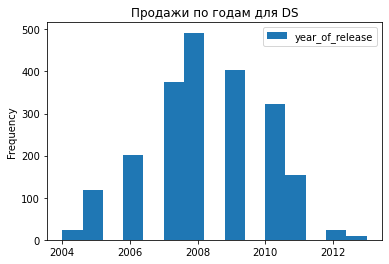

In [26]:
#Уберем эту ошибку и отобразим новую визуализацию
df =df[~((df['platform'] == 'DS') & (df['year_of_release'] == 1985))]
ds = df[df['platform']=='DS']
ds.plot(kind='hist',x='all_sales',y='year_of_release',bins=15);
plt.title('Продажи по годам для DS');

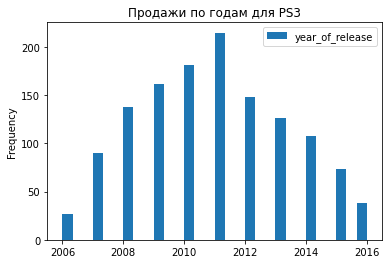

In [27]:
ps3.plot(kind='hist',x='all_sales',y='year_of_release',bins=30);
plt.title('Продажи по годам для PS3');

Text(0.5, 1.0, 'Продажи по годам для Wii')

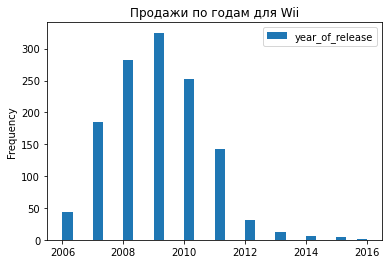

In [28]:
wii.plot(kind='hist',x='all_sales',y='year_of_release',bins=30);
plt.title('Продажи по годам для Wii')

Text(0.5, 1.0, 'Продажи по годам для X360')

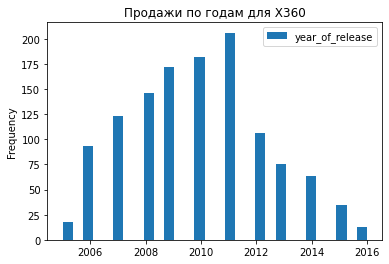

In [29]:
x360.plot(kind='hist',x='all_sales',y='year_of_release',bins=30);
plt.title('Продажи по годам для X360')

Text(0.5, 1.0, 'Продажи по годам для PS4')

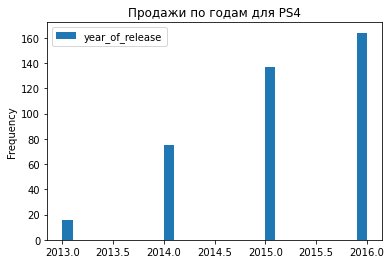

In [30]:
ps4.plot(kind='hist',x='all_sales',y='year_of_release',bins=30);
plt.title('Продажи по годам для PS4')

Text(0.5, 1.0, 'Продажи по годам для PC')

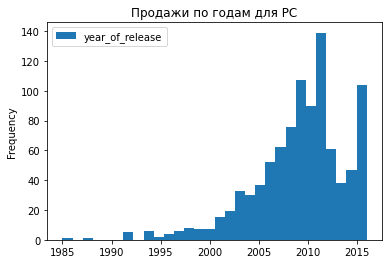

In [31]:
pc.plot(kind='hist',x='all_sales',y='year_of_release',bins=30);
plt.title('Продажи по годам для PC')

Text(0.5, 1.0, 'Продажи по годам для PSP')

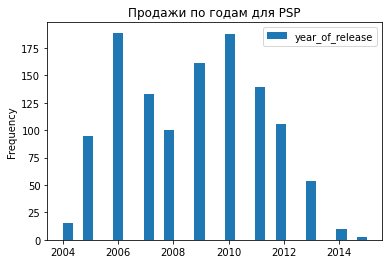

In [32]:
psp.plot(kind='hist',x='all_sales',y='year_of_release',bins=30);
plt.title('Продажи по годам для PSP')

Text(0.5, 1.0, 'Продажи по годам для PS')

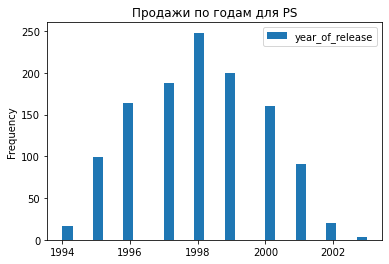

In [33]:
ps.plot(kind='hist',x='all_sales',y='year_of_release',bins=30);
plt.title('Продажи по годам для PS')

Text(0.5, 1.0, 'Продажи по годам для XOne')

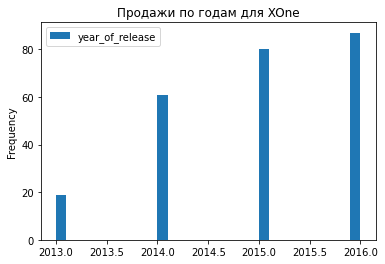

In [34]:
x_one.plot(kind='hist',x='all_sales',y='year_of_release',bins=30);
plt.title('Продажи по годам для XOne')

Text(0.5, 1.0, 'Продажи по годам для PSV')

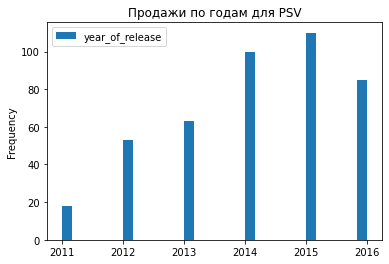

In [35]:
psv.plot(kind='hist',x='all_sales',y='year_of_release',bins=30);
plt.title('Продажи по годам для PSV')

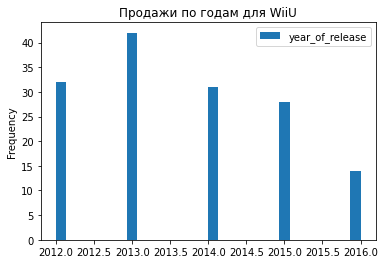

In [36]:
wiiu.plot(kind='hist',x='all_sales',y='year_of_release',bins=30);
plt.title('Продажи по годам для WiiU');

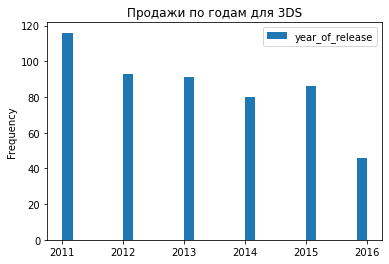

In [37]:
ds3.plot(kind='hist',x='all_sales',y='year_of_release',bins=30);
plt.title('Продажи по годам для 3DS');

Лучше всего ранее на рынке держались XBOX360,PS,PS2,PS3. Среднее время выхода на "пик" продаж 3-5 лет. Для всех платформ из выборки характерно увеличение продаж с каждым годом до момента достижения максимальных продаж. Платформа DS сильно отличается от остальных: у этой платформы быстрый прирост продаж с каждым годом, быстрый выход на максимальную прибыль и так же быстрое падание продаж и уход с рынка. Лидеры XBOX360,PS2,PS3 исчезают с рынка в среднем за 4-5 лет, постепенно с каждым годом теряя в продажах.Основываясь на этих данных мы можем сделать предполложение что для нас интересны платформы: PS4, XOne, PC. PS4 и XOne продолжают расти с момента появления на рынке и в следующем году скорее всего окажутся на пике продаж. PC возможно может повторить второй пик как на графике платформы PSP. Актуальный период для анализа будем считать последние 5 лет.

**Сделаем срез для актуального периода**

In [38]:
actual_period = df.query('year_of_release >= 2012')
actual_period

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,not determined,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,not determined,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,not determined,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,<NA>,NaN,not determined,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,not determined,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,not determined,0.01


Построим диаграммы размах для всех платформ за актуальный период в двух видах: со всеми выбросами и с крупными боксплотами

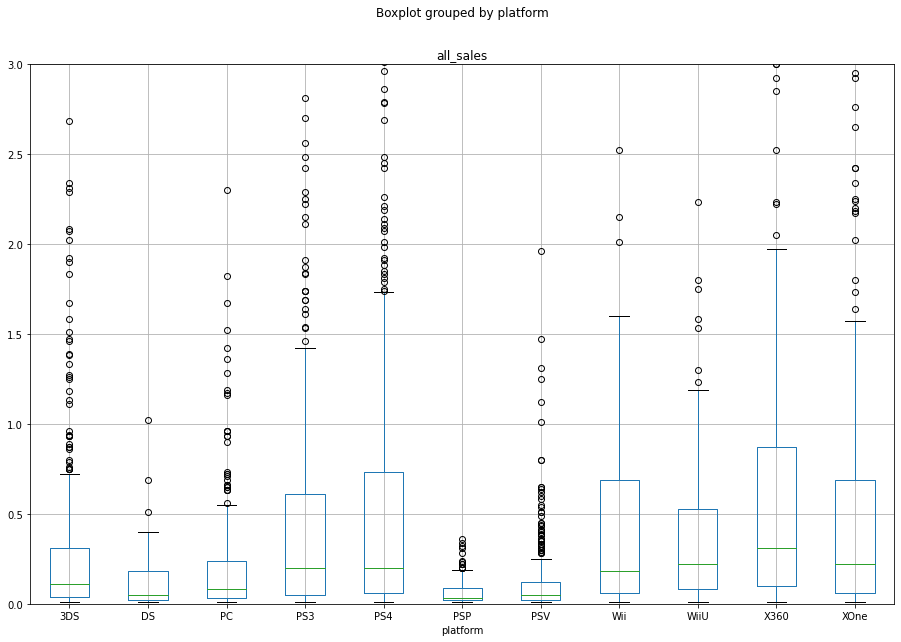

In [39]:
plot_all = actual_period.boxplot('all_sales', by='platform',figsize=(15,10)).set_ylim(0,3)

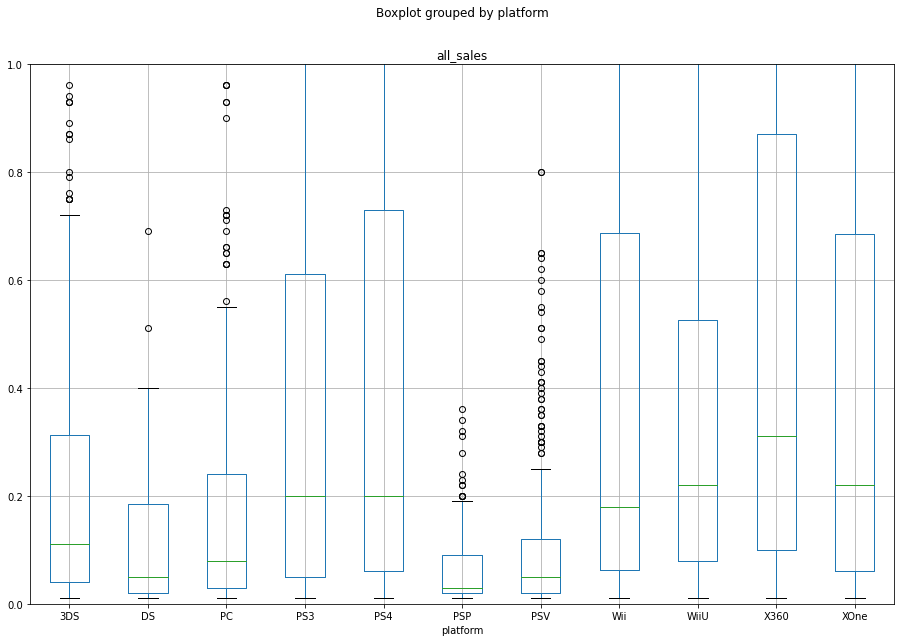

In [40]:
plot_all_scale = actual_period.boxplot('all_sales', by='platform',figsize=(15,10)).set_ylim(0,1)

Выбросы есть у каждой платформы - скорее всего это крупные или удачные проекты которые смогли показать очень высокую прибль.Но далеко не каждая игра может расчитывать на такую прибль, а иногда даже игры могут не окупить разработку.Из осташихся платформ мы можем подтвердить предидущий вывод, что актуальными для разработки остаются платформы: PS4, XOne, PC. Так же графике PC показывает слишком малую выручку с продаж в сравнении с общими продажами - эта платформа слишком раскованная для издания игр.

**Проверим зависимость между продажами и оценками для популярных платформ**

Рассмотрим зависимости продаж и оценов для PS4

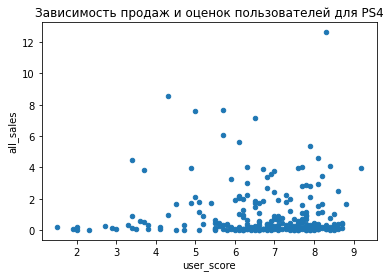

In [41]:
#Построим диаграмму рассеяния для пары: Все продажи- оценки пользователей
actual_period[actual_period['platform']=='PS4'].plot(x='user_score', y='all_sales', kind='scatter')
plt.title('Зависимость продаж и оценок пользователей для PS4');

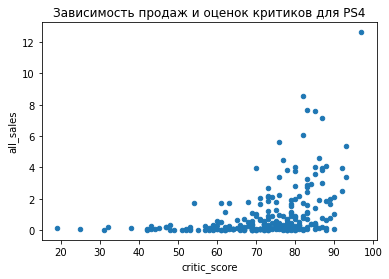

In [42]:
#Построим диаграмму рассеяния для пары: Все продажи- оценки критиков
actual_period[actual_period['platform']=='PS4'].plot(x='critic_score', y='all_sales', kind='scatter')
plt.title('Зависимость продаж и оценок критиков для PS4');

Рассмотрим зависимости продаж и оценов для XONE

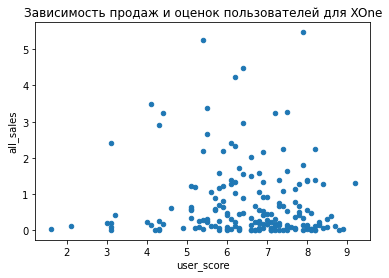

In [43]:
#Построим диаграмму рассеяния для пары: Все продажи- оценки пользователей
actual_period[actual_period['platform']=='XOne'].plot(x='user_score', y='all_sales', kind='scatter')
plt.title('Зависимость продаж и оценок пользователей для XOne');

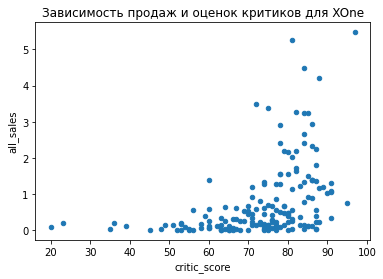

In [44]:
#Построим диаграмму рассеяния для пары: Все продажи- оценки критиков
actual_period[actual_period['platform']=='XOne'].plot(x='critic_score', y='all_sales', kind='scatter')
plt.title('Зависимость продаж и оценок критиков для XOne');

Рассмотрим зависимости продаж и оценов для PS3

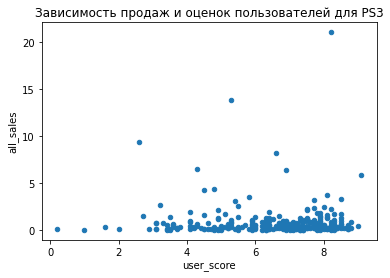

In [45]:
#Построим диаграмму рассеяния для пары: Все продажи- оценки пользователей
actual_period[actual_period['platform']=='PS3'].plot(x='user_score', y='all_sales', kind='scatter')
plt.title('Зависимость продаж и оценок пользователей для PS3');

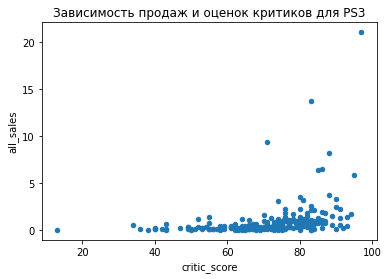

In [46]:
#Построим диаграмму рассеяния для пары: Все продажи- оценки критиков
actual_period[actual_period['platform']=='PS3'].plot(x='critic_score', y='all_sales', kind='scatter')
plt.title('Зависимость продаж и оценок критиков для PS3');

Рассмотрим зависимости продаж и оценов для X360

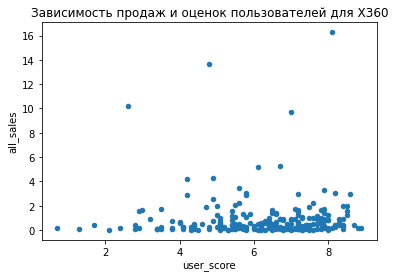

In [47]:
#Построим диаграмму рассеяния для пары: Все продажи- оценки пользователей
actual_period[actual_period['platform']=='X360'].plot(x='user_score', y='all_sales', kind='scatter')
plt.title('Зависимость продаж и оценок пользователей для X360');

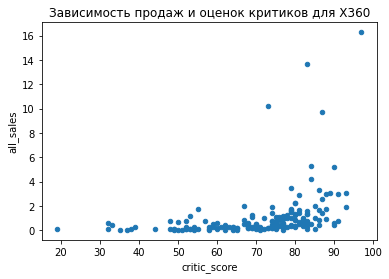

In [48]:
#Построим диаграмму рассеяния для пары: Все продажи- оценки критиков
actual_period[actual_period['platform']=='X360'].plot(x='critic_score', y='all_sales', kind='scatter')
plt.title('Зависимость продаж и оценок критиков для X360');

Рассмотрим зависимости продаж и оценов для PC

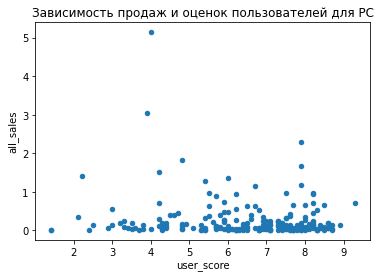

In [49]:
#Построим диаграмму рассеяния для пары: Все продажи- оценки пользователей
actual_period[actual_period['platform']=='PC'].plot(x='user_score', y='all_sales', kind='scatter')
plt.title('Зависимость продаж и оценок пользователей для PC');

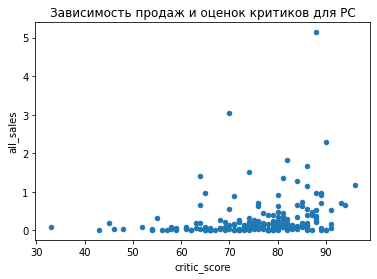

In [50]:
#Построим диаграмму рассеяния для пары: Все продажи- оценки критиков
actual_period[actual_period['platform']=='PC'].plot(x='critic_score', y='all_sales', kind='scatter')
plt.title('Зависимость продаж и оценок критиков для PC');

In [51]:
#Посчитаем корреляцию между отзывами и продажами
corr_by_price = actual_period[['all_sales',\
           'user_score',\
           'critic_score',\
           ]].corr()
corr_by_price.style.background_gradient()

,all_sales,user_score,critic_score
all_sales,1.000000,0.004429,0.308197
user_score,0.004429,1.000000,0.517727
critic_score,0.308197,0.517727,1.000000


Оценки критиков сильнее влияют на продажи, чем оценки пользователей. Диаграммы рассеяния наводят на мысль что критики могли оказаться продажными и ставить высокие оценки на заказ, когда пользователи могли занижать иногда оценки от собственной неприязни или еще по какой-либо не объективной причины. Так же есть сильная зависимость у оценок пользователей и критиков.

**Рассмотрим самые популярные жанры**

In [52]:
#Определим количество всех игр по жанрам
most_popular_genre = actual_period.groupby('genre').agg({'name':'count'})
most_popular_genre.sort_values(by='name', ascending=False)

,name
genre,
Action,1031
Role-Playing,370
Adventure,302
Sports,268
Shooter,235
Misc,192
Racing,115
Fighting,109
Platform,85


In [53]:
#Определим общие продажи для каждого жанра
most_popular_sales = actual_period.groupby('genre').agg({'all_sales':'sum'})
most_popular_sales.sort_values(by='all_sales', ascending=False)

,all_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.07
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


In [54]:
#Определим медианные значения продажи для каждого жанра
most_popular_median = actual_period.groupby('genre').agg({'all_sales':'median'})
most_popular_median.sort_values(by='all_sales', ascending=False)

,all_sales
genre,
Shooter,0.440
Sports,0.240
Platform,0.210
Role-Playing,0.140
Racing,0.140
Fighting,0.130
Action,0.120
Misc,0.120
Simulation,0.120


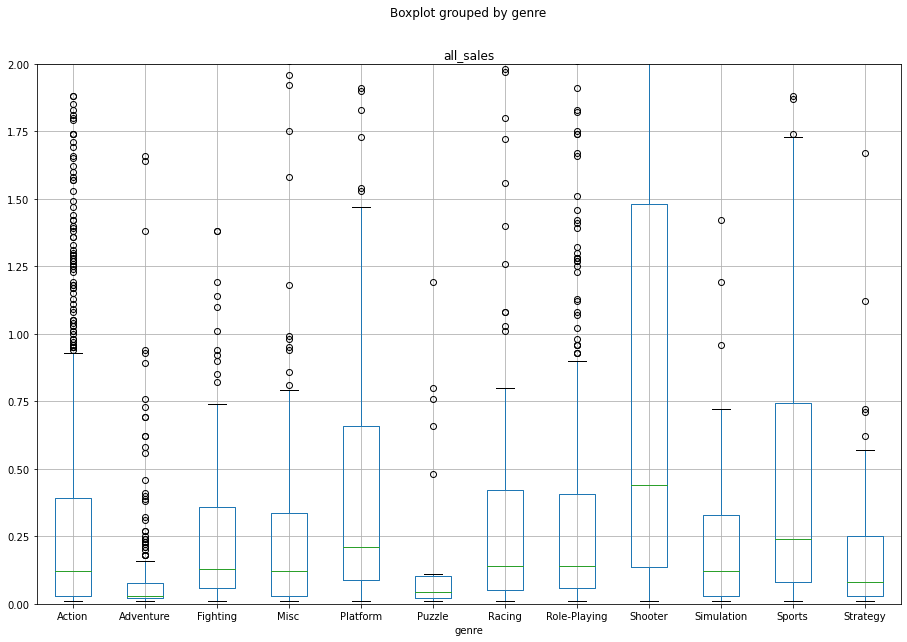

In [55]:
plot_by_ganre = actual_period.boxplot('all_sales', by='genre',figsize=(15,10)).set_ylim(0,2)

Шутеры самый беспроигрышный вариант для разработки и продаж, далее следуют Спорт и Платформеры. Экшен игры имеют хорошие продажи за счет их количества, но не так надежны и стабильны для бизнеса ( у них слишком много выбросов и эти значения сильно искажают данные)

### Составим портрет пользователя для каждого региона

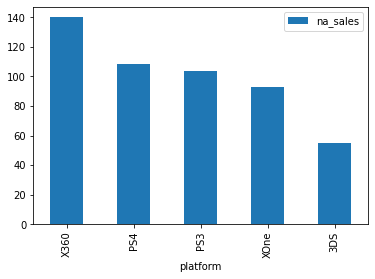

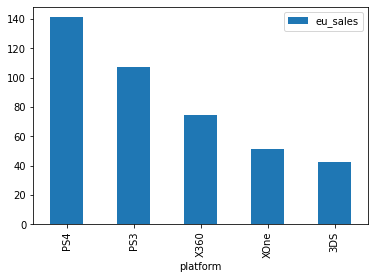

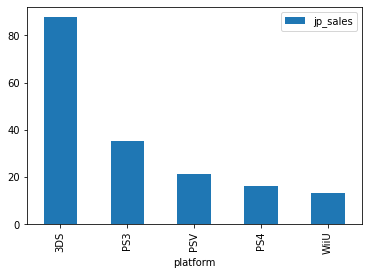

In [56]:
#Определим топ-5 предпочтительных платформ
actual_period.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar');
actual_period.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar');
actual_period.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar');

В Америке лидируют продажи игр для приставки которая производиться в Америке - это логично). В Японии ситуация аналогичная - лидируют консоли которые производились в японии. В Европе предпочитают все сразу, но лидируют PS4 и PS3, на третьем и четвертом месте расположились заокеанские конкуренты Xbox.

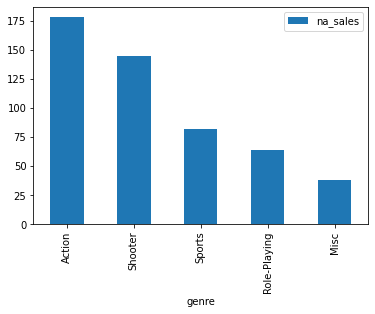

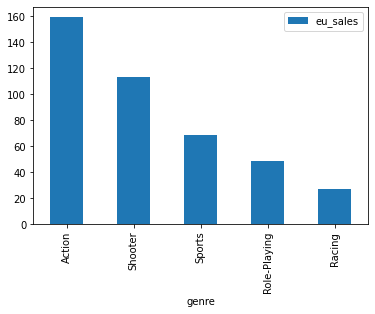

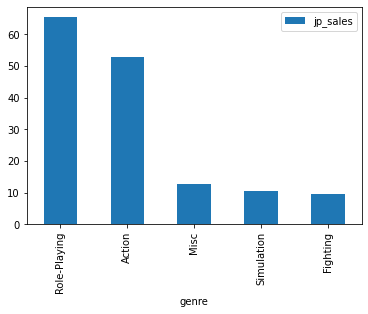

In [57]:
#Определим топ-5 жанры для каждого региона
actual_period.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar');
actual_period.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar');
actual_period.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar');

Европейцы и американцы очень схожи в жанровых предпочтениях, почти одинаковые продажи для жанров Шутер,Экшен и Спорт. Японцы как и ожидалось чаще всего играют в role-play( по любому запросу role-play игр в гугле будет очевидно понятно по визуальному составляющему игр они ориентируются в основном на азиатскую аудиторию), на втором месте Экшен, но а остальыне жанру в Японии явно проигрывают по сравнению с первыми двумя.

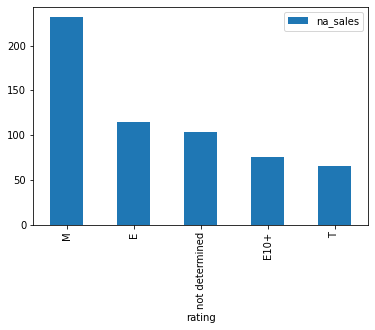

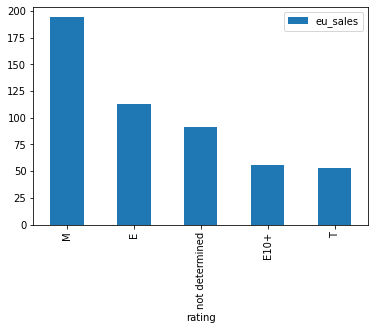

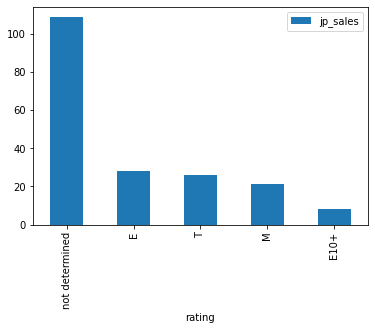

In [58]:
#Посмотрим как влияет райтинг на продажи в каждом регионе
actual_period.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar');
actual_period.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar');
actual_period.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar');

Продажи по рейтингам практически идентичны для Америки и Европы.

Игры с рейтингом 'M' для взрослых — дают максимальнуб прибыль в NA и EU регионах. Эта самая широкая аудитория и скорее всего покупатели любят более жесткий контент в играх.

В NA Регионе: Второе место по продажам занимают игры с рейтингом 'Е'. На третьем месте игры рейтинг которых не определен, эти игры были произведены за территорией Канады\США и не могут получить оценку их рейтинга.

В EU Регионе:Второе место по продажам занимают игры с рейтингом 'Е'. На третьем месте игры рейтинг которых не определен, эти игры были произведены за территорией Канады\США и не могут получить оценку их рейтинга.

В JP: Совсем отличная от других регионов ситуация и группа игр, рейтинг которых не определен, занимает первое место, значительно превосходя по продажам все остальные группы. Это логично скорее всего игры были произведены в азиатском регионе и не могли получить рейтинг ESRB

Вывод: Продажи по рейтингам для Америки и Европы очень похожи, для оценки Японии по рейтинга возникает трудность, т.к рейтинг ESRB учитывется только для игр произведенных для США и Канады. Игры которые популярны в Азии чаще всего производились скорее всего на территории Азии и данный рейтинг не получали.

### Проверка гипотез

Будем использовать t-критерий Стьюдента т.к нужно сравнить средние, когда распределение данных близко к нормальному.

**Гипотезы:**

-Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

-Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Уточним нулевую гипотезу и альтернативную для первой гипотезы:**

H0: средний пользовательский рейтинг платформ Xbox One и PC одинаковый

H1: средний пользовательский рейтинг платформ Xbox One и PC различается

In [59]:
#Используем t-тест Стьюдента, потому как сравниваемые выборки независимы между собой.
alpha = 0.05
xboxone_test = actual_period[(actual_period['platform'] == 'XOne') & (df['user_score'] > 0)]['user_score']
pc_test = actual_period[(actual_period['platform'] == 'PC') & (df['user_score'] > 0)]['user_score']

results_1 = st.ttest_ind(xboxone_test, pc_test)

/tmp/ipykernel_1240/1401543901.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  xboxone_test = actual_period[(actual_period['platform'] == 'XOne') & (df['user_score'] > 0)]['user_score']
/tmp/ipykernel_1240/1401543901.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pc_test = actual_period[(actual_period['platform'] == 'PC') & (df['user_score'] > 0)]['user_score']


In [60]:
print('Средний пользовательский рейтинг платформы XOne', round(actual_period.query('platform== "XOne"')['user_score'].mean(),2))
print('Средний пользовательский рейтинг платформы PC', round(actual_period.query('platform== "PC"')['user_score'].mean(),2))
print()
print('p-значение:', results_1.pvalue)

if (results_1.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг платформы XOne 6.52
Средний пользовательский рейтинг платформы PC 6.43

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Cредний пользовательский рейтинг платформ Xbox One и PC одинаковый

**Уточним нулевую гипотезу и альтернативную для второй гипотезы:**

H0: средний пользовательский рейтинг жанров Action и Sports одинаковый

H1: средний пользовательский рейтинг жанров Action и Sports различается

In [61]:
action_test = actual_period[(actual_period['genre'] == 'Action') & (df['user_score'] > 0)]['user_score']
sports_test = actual_period[(actual_period['genre'] == 'Sports') & (df['user_score'] > 0)]['user_score']
results_2 = st.ttest_ind(action_test, sports_test,nan_policy='omit')

/tmp/ipykernel_1240/1134216639.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  action_test = actual_period[(actual_period['genre'] == 'Action') & (df['user_score'] > 0)]['user_score']
/tmp/ipykernel_1240/1134216639.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sports_test = actual_period[(actual_period['genre'] == 'Sports') & (df['user_score'] > 0)]['user_score']


In [62]:
print('Средний пользовательский рейтинг жанра Action', round(actual_period.query('genre== "Action"')['user_score'].mean(),2))
print('Средний пользовательский рейтинг жанра Sports', round(actual_period.query('genre== "Sports"')['user_score'].mean(),2))
print()
print('p-значение:', results_2.pvalue)

if (results_2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


Средний пользовательский рейтинг жанра Action 6.83
Средний пользовательский рейтинг жанра Sports 5.46

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


Средний пользовательский рейтинг жанров Action и Sports различается

### Общий вывод

Игровой рынок начал испытавать проблемы с 2008 года, количество выпускаемых игр снизилось. Технологии и качество выпускаемых игр улучшилось, соответственно увеличилась стоимость производства игр. Теперь производителям приходится выпускать игры с большей осторожностью и присматриваться к популярным игровым платформам и жанрам в разных регионах.

Оценки пользователей и критиков влияют на продажи и разработчикам особенно важно прислушиваться к своей аудитории и проводить исследования которые помогу определить чего жду покупатели от их продуктов. Зависимость продаж от оценок критиков выше, но тут стоит помнить о том, что "заказные оценки" от критиков могут сильно занизить оценки недовольных покупателей которые совершили покупку основываясь на мнении эксперта.

Слишком большое количество пропусков в (оценках покупателей, оценках критиков и рейтинге) затрудняет проведение полноценного исследования для Японии.

Игровые платформы уходят с рынка в среднем примерно за 4-6 лет после достижения максимальных продаж. Платформы PS4 и XBOX ONE на конец 2016 года находятся на этапе развития и вероятнее всего еще несколько лет будут показывать хорошие продажи. Производителям нужно в первую очередь рассмартивать их для производства игр. 

Платформа PC после значительной потери в продажах после 2011 года (скорее всего это связано с активным развитием альтернативных платформ) начала возвращаться к предидущим показателям и эту платформу так же можно рассматривать для производства игр, но с большей осторожностью, т.к средния значения продаж для этой платформы значительно ниже консолей PS4 и XBOX ONE. Но так же для платформы PC значительно больше выбросов для которых характерны большие продажи - вероятнее всего это ААА проект больших студий, значит при грамотной стратегии разработчика можно попасть в эти значения и получить большую прибыль.

**Рекомендации:**

1. Отладить инстументы выгрузки и получения данных и провести повтороное исследование
2. Разработчикам без инвесторов и большого опыта в индустрии лучше рассматривать в первую очередь активно развивающиеся платформы (PS4 и XBOX ONE)
3. До выпуска продукта выстроить работу с потенциальными покупателями и прислушиваться к их потребностям.
4. Для максимальной прибыли рассматривать для разработки популярные жанры и рейтинги для каждого региона.
5. Для максимальной прибыли ориентироваться на самые широкие аудитории при получении рейтинга игры.

**Вывод для предстоящей рекламной компании на 2017год:**
1. Вероятнее всего самые лучшие продажи мы получим для консолей PS4 и XOne основываясь на нашем исследовании, эти платформы развиваются и в следующем году покажут хорошие продажи
2. Жанр Экшен имеет хорошие общие продажи для регионов Европы и Америки ,но далеко не каждая игра хорошо продается. Лучше рассматривать жанры: Шутеры и Спорт - они имеют хорошие медианные значения и стабильную выручку с продаж без большого количества выбросов ( для бизнеса это более надежный выбор)
3. Платформа PC с 2015 года начала снова расти в продажах, но показывает низкие медианные значения в продажах - может быть рискованно для вложений в рекламную компанию.
4. Аудитория за актуальный период более заинтересована в покупки игры с рейтингом - 'Для взрослых'. Покупают игры с контентом для взрослых. Это хорошо для бизнеса, т.к взрослая аудитория более платежеспособна.

**В итоге:**
При планировании рекламной компании рекомендуется делать акцент на платформы PS4 и XOne в жанрах Shooter и Sport с учетом что игры с рейтингом 17+ более популярны.